# Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Data and Explore its Information

In [5]:
# read data
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [6]:
print("\n=== Shape ===")
print(df.shape)


=== Shape ===
(282, 16)


In [7]:
print("\n=== Columns ===")
print(df.columns.tolist())


=== Columns ===
['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'response.code', 'dst_port', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']


In [8]:
print("\n=== Info ===")
print(df.info())


=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("\n=== Numerical Summary ===")
display(df[numeric_cols].describe())


=== Numerical Summary ===


,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


# Data Pre-processing and Exploratory Data Analysis

In [11]:
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64


It seems the data is fine in terms of missing information.

## Analysis of Numerical Cloumns

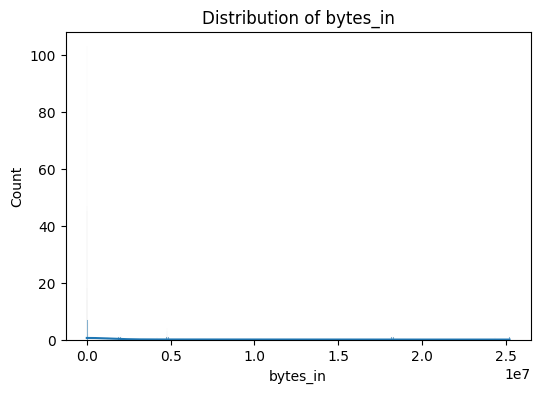

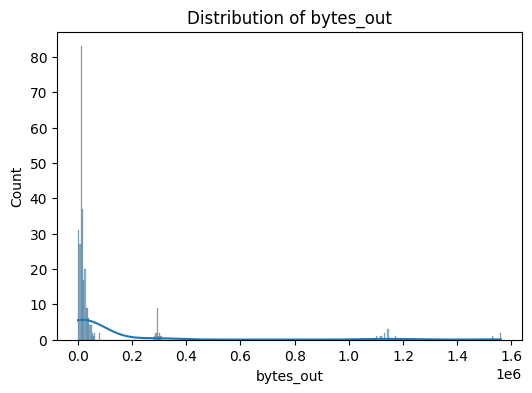

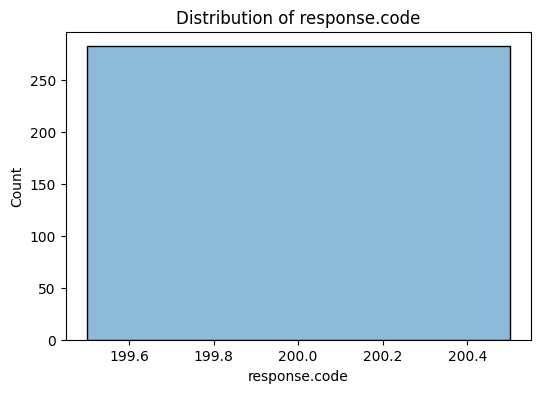

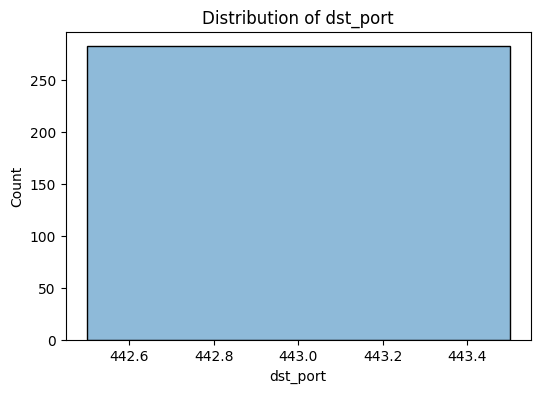

In [14]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()
    print('\n')

## Correlation Matrix of Numerical Features

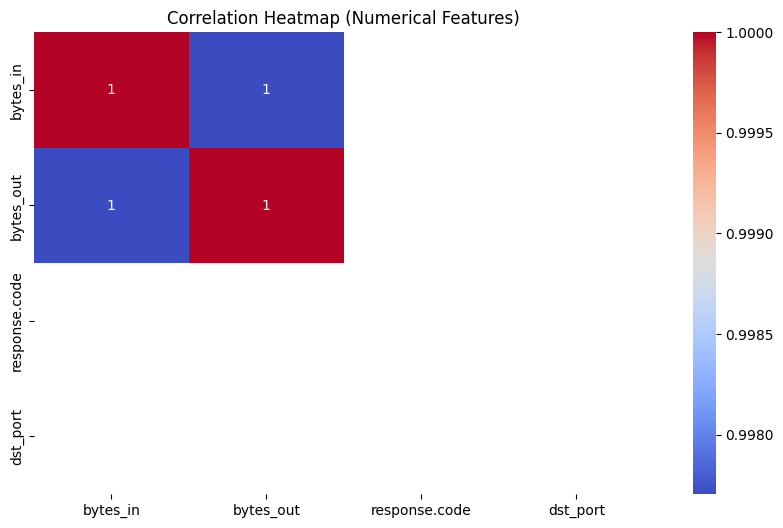

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

## Analysis of Categorical Columns

In [18]:
cat_cols = df.select_dtypes(include=["object"]).columns
print("\n=== Categorical Features ===")
print(cat_cols.tolist())


=== Categorical Features ===
['creation_time', 'end_time', 'src_ip', 'src_ip_country_code', 'protocol', 'dst_ip', 'rule_names', 'observation_name', 'source.meta', 'source.name', 'time', 'detection_types']


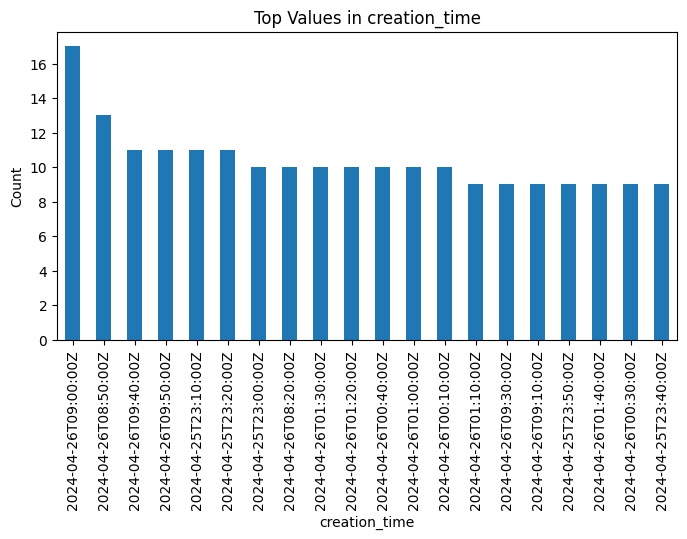

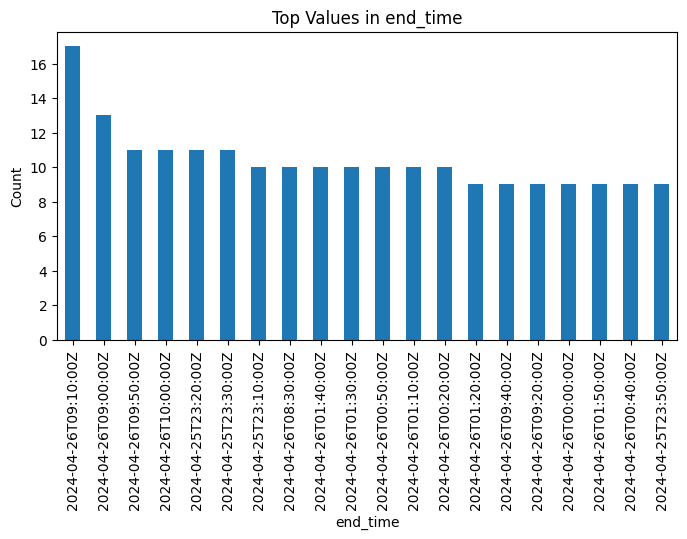

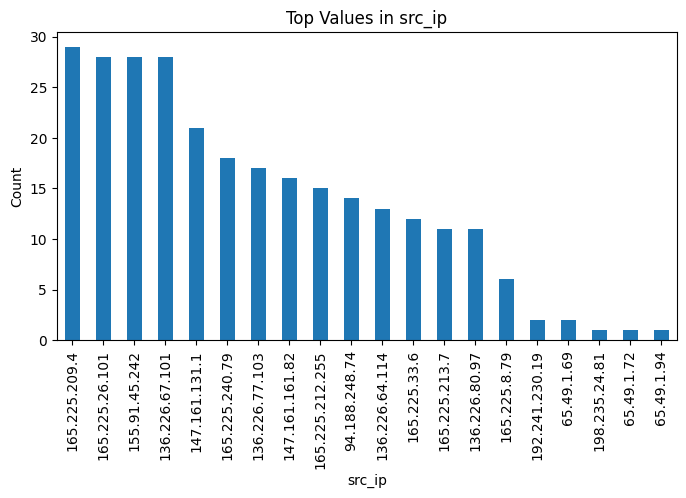

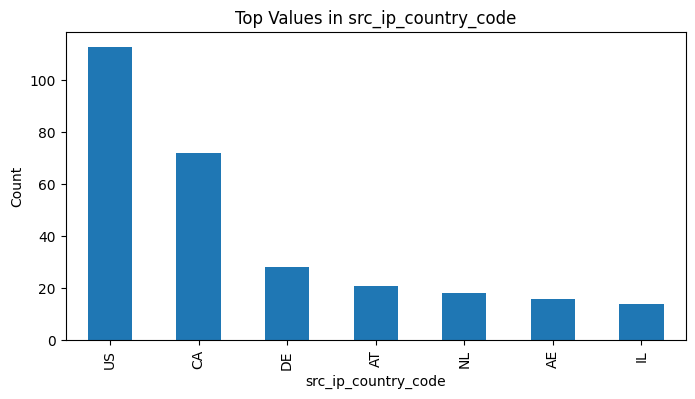

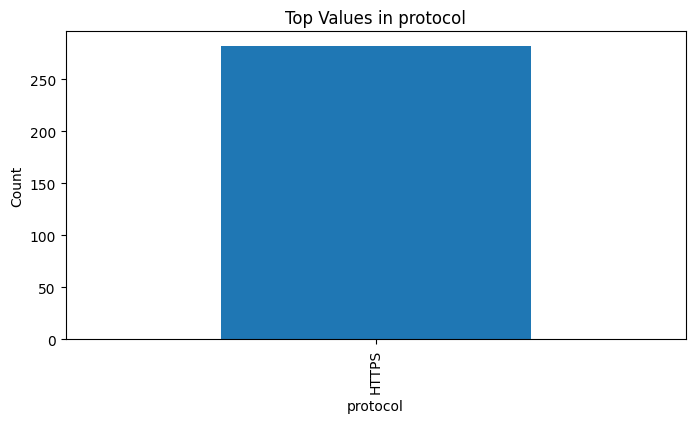

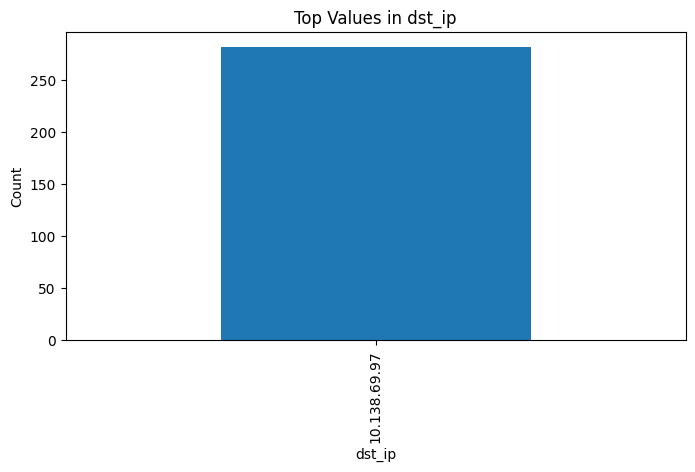

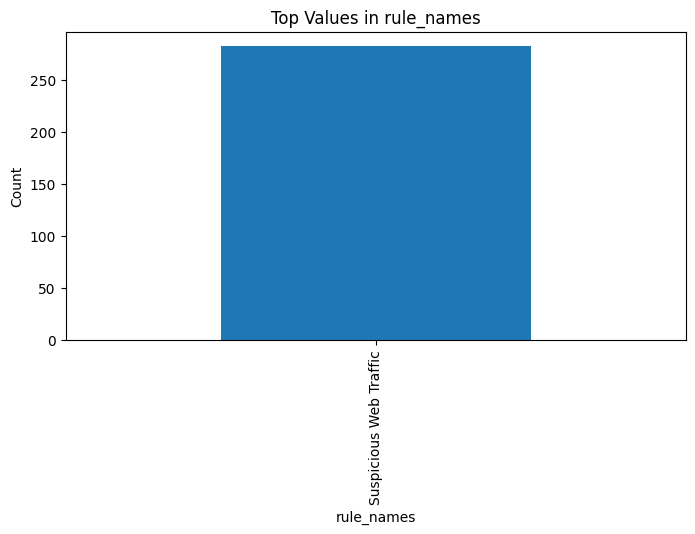

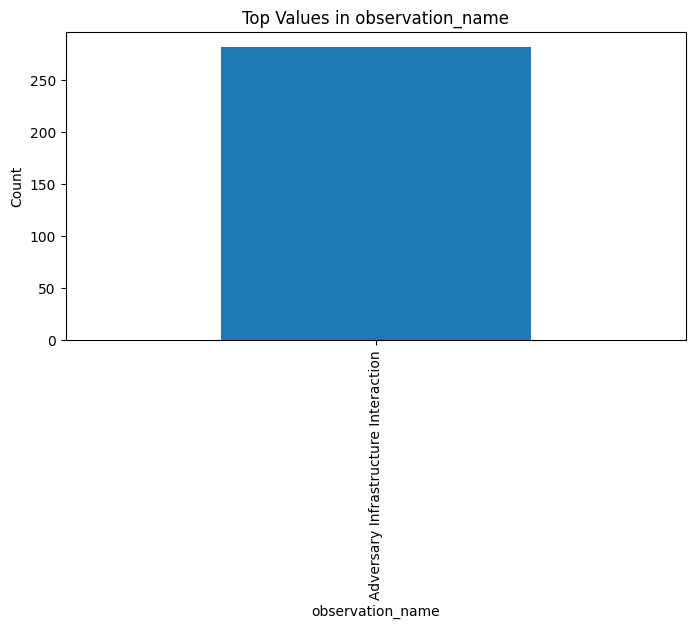

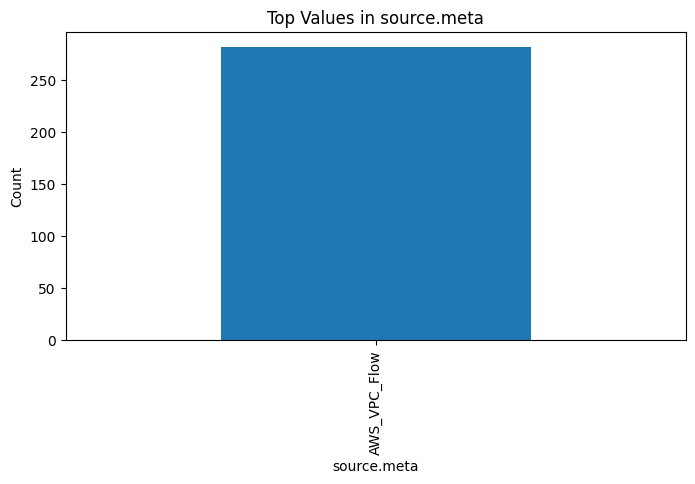

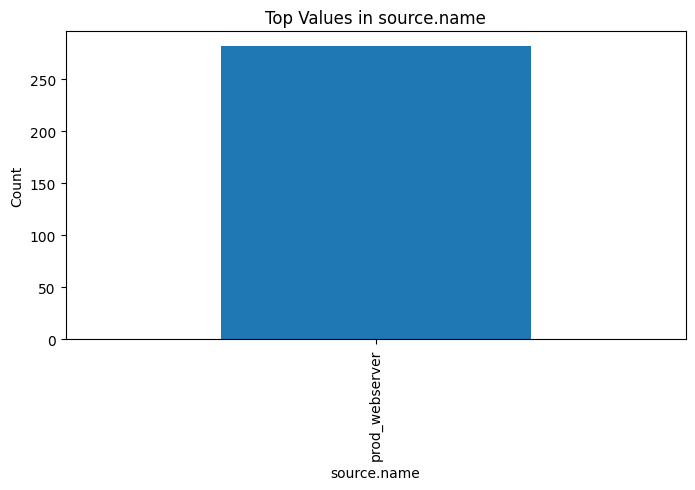

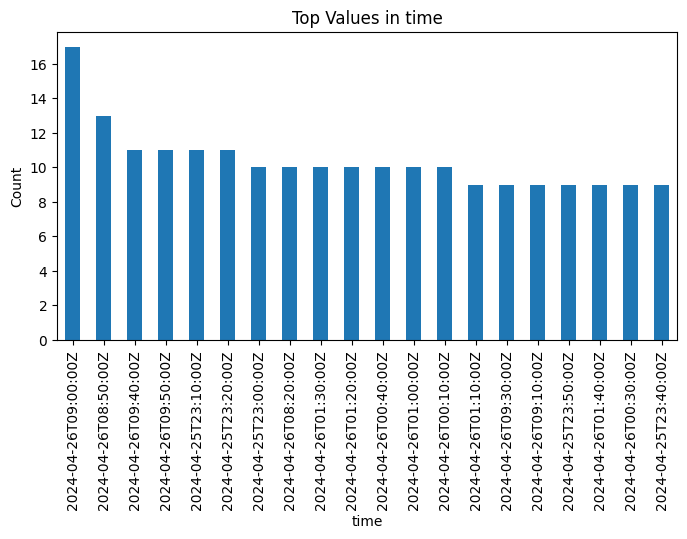

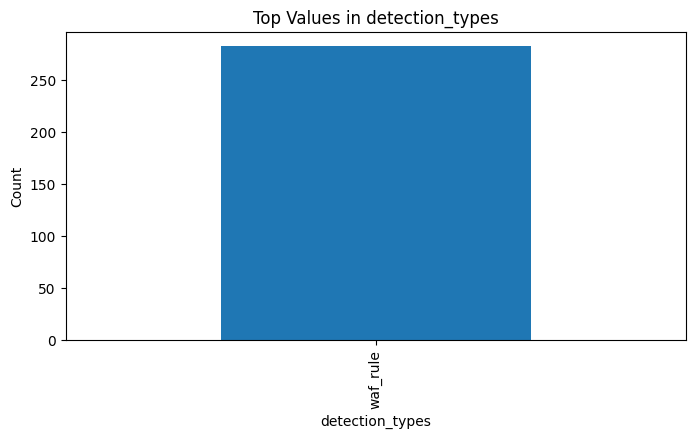

In [19]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(20).plot(kind="bar")
    plt.title(f"Top Values in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Findings
- It seems the data contains only fradulent web traffic data.
- A single type of attack was used.
- US was attacked the most.

## Analysis of IP


Top Source IPs:


src_ip
165.225.209.4      29
165.225.26.101     28
155.91.45.242      28
136.226.67.101     28
147.161.131.1      21
165.225.240.79     18
136.226.77.103     17
147.161.161.82     16
165.225.212.255    15
94.188.248.74      14
Name: count, dtype: int64


Top Destination IPs:


dst_ip
10.138.69.97    282
Name: count, dtype: int64

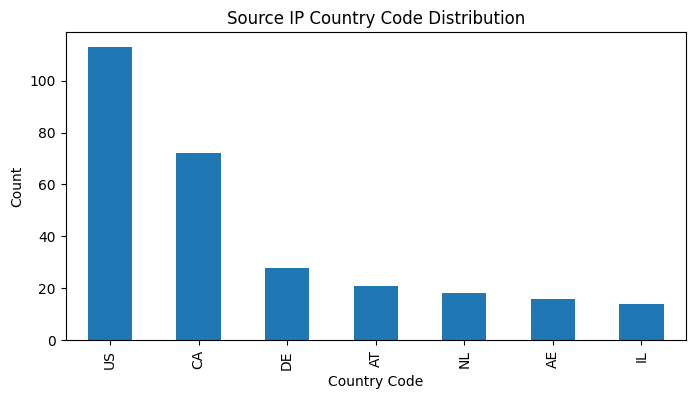

In [22]:
print("\nTop Source IPs:")
display(df["src_ip"].value_counts().head(10))

print("\nTop Destination IPs:")
display(df["dst_ip"].value_counts().head(10))

plt.figure(figsize=(8,4))
df["src_ip_country_code"].value_counts().plot(kind="bar")
plt.title("Source IP Country Code Distribution")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()

## Analysis of Time

In [24]:
df["creation_time"] = pd.to_datetime(df["creation_time"])
df["time"] = pd.to_datetime(df["time"])

df["hour"] = df["creation_time"].dt.hour
df["weekday"] = df["creation_time"].dt.weekday

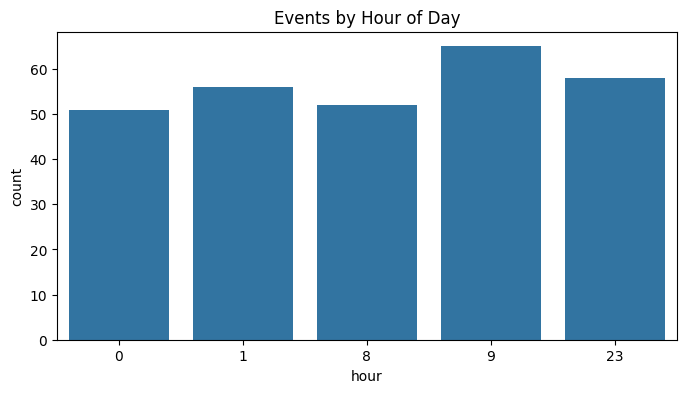

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["hour"])
plt.title("Events by Hour of Day")
plt.show()

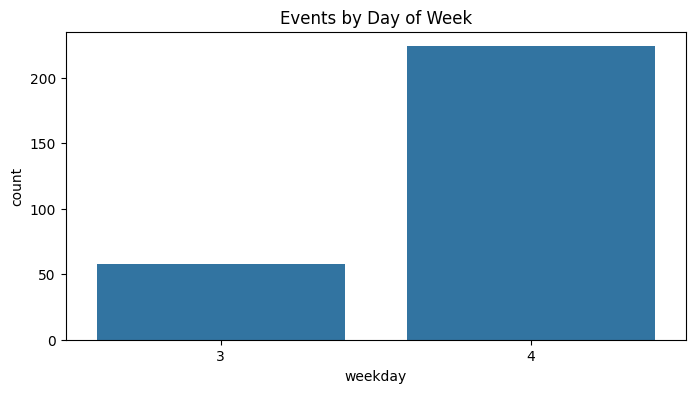

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x=df["weekday"])
plt.title("Events by Day of Week")
plt.show()

Weekday `4` seems to the peak day of attack.

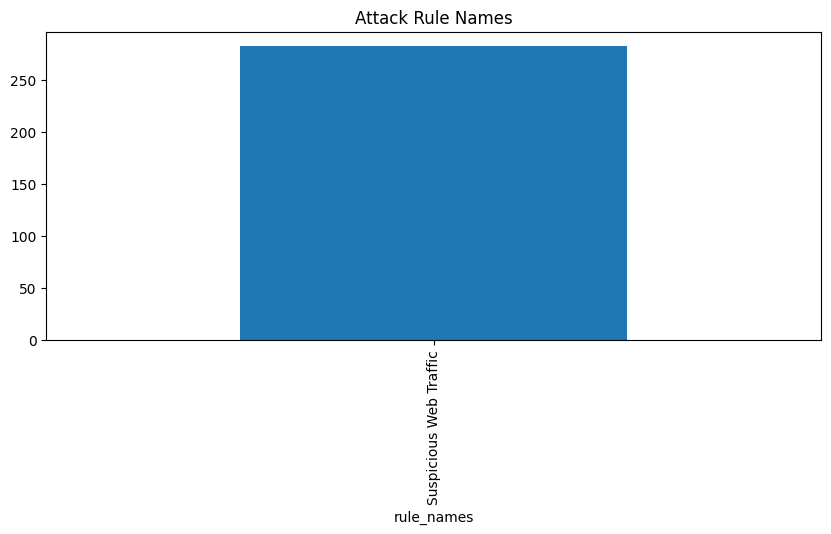

In [28]:
plt.figure(figsize=(10,4))
df["rule_names"].value_counts().plot(kind="bar")
plt.title("Attack Rule Names")
plt.show()

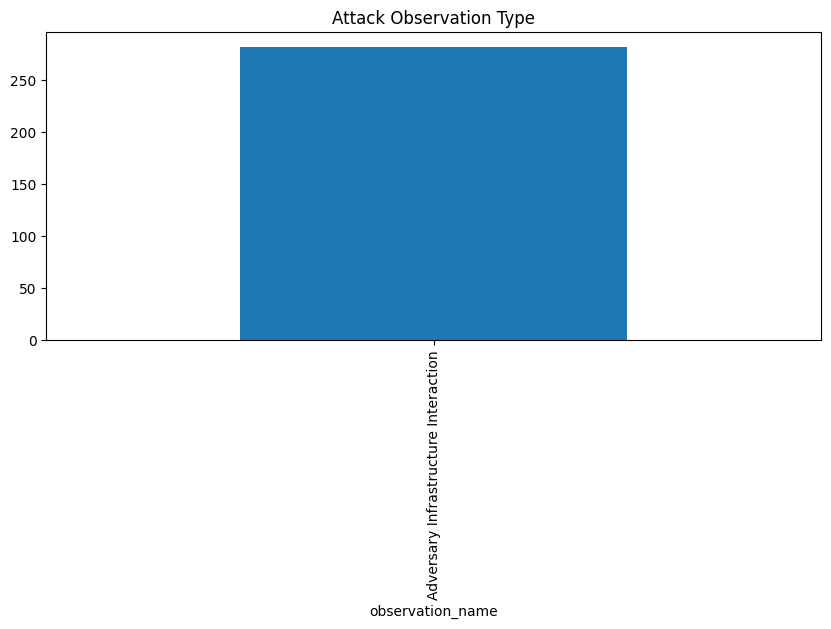

In [29]:
plt.figure(figsize=(10,4))
df["observation_name"].value_counts().plot(kind="bar")
plt.title("Attack Observation Type")
plt.show()

A single type of attack was used.

# Feature Engineering and Feature Selection

In [32]:
# Convert to datetime
df["creation_time"] = pd.to_datetime(df["creation_time"])
df["end_time"] = pd.to_datetime(df["end_time"])
df["time"] = pd.to_datetime(df["time"])

# Extract features from creation_time
df["creation_hour"] = df["creation_time"].dt.hour
df["creation_minute"] = df["creation_time"].dt.minute
df["creation_weekday"] = df["creation_time"].dt.weekday
df["creation_epoch"] = df["creation_time"].astype(np.int64) // 10**9

# Extract features from end_time
df["end_hour"] = df["end_time"].dt.hour
df["end_minute"] = df["end_time"].dt.minute
df["end_weekday"] = df["end_time"].dt.weekday
df["end_epoch"] = df["end_time"].astype(np.int64) // 10**9

# Extract from generic "time"
df["time_hour"] = df["time"].dt.hour
df["time_minute"] = df["time"].dt.minute
df["time_weekday"] = df["time"].dt.weekday
df["time_epoch"] = df["time"].astype(np.int64) // 10**9

# Duration feature
df["duration_sec"] = (df["end_time"] - df["creation_time"]).dt.total_seconds()

# Drop raw timestamp columns
df = df.drop(columns=["creation_time", "end_time", "time"])

## Feature Selection

These features explain the attack rather than describe traffic behavior:

| Column             | Why Avoid?                                                     |
| ------------------ | -------------------------------------------------------------- |
| `rule_names`       | It's literally a rule labeling the attack — leaks information. |
| `observation_name` | Attack class — autoencoder should NOT train on labels.         |
| `source.meta`      | Static AWS system label.                                       |
| `source.name`      | Always `prod_webserver` (no value).                            |
| `detection_types`  | Tells us the detection mechanism — not traffic.               |

These will make the autoencoder "cheat" by memorizing labels.

Raw IPs are high-cardinality identifiers, not behavior descriptors.

In [34]:
drop_cols = [
    "rule_names",
    "observation_name",
    "source.meta",
    "source.name",
    "detection_types",
    "src_ip",
    "dst_ip"
]

df = df.drop(columns=drop_cols)

In [35]:
categorical_cols = ["protocol", "src_ip_country_code"]

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

Features to include:

| Feature         | Why Include?               |
| --------------- | -------------------------- |
| `bytes_in`      | Traffic volume behavior    |
| `bytes_out`     | Response volume            |
| `response.code` | Behavior of the web server |
| `dst_port`      | Target port (e.g., 443)    |
| `protocol`      | (HTTPS, TLS, etc.)         |
| `creation_hour`, `creation_minute` | Attack behavior by time          |
| `creation_weekday`                 | Day-of-week patterns             |
| `creation_epoch`                   | Temporal progression             |
| `end_epoch`                        | May correlate with surge attacks |
| `duration_sec`                     | Length of connection             |
| `src_ip_country_code` | Strong attack indicator |


In [37]:
selected_features = [
    "bytes_in",
    "bytes_out",
    "response.code",
    "dst_port",
    "protocol",
    "src_ip_country_code",
    "creation_hour",
    "creation_minute",
    "creation_weekday",
    "creation_epoch",
    "end_hour",
    "end_minute",
    "end_weekday",
    "end_epoch",
    "time_hour",
    "time_minute",
    "time_weekday",
    "time_epoch",
    "duration_sec"
]

X = df[selected_features]

## Standardization

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Model Definition

In [39]:
input_dim = X_train.shape[1]

with tf.device('/GPU:0'):
    input_dim = X_train.shape[1]

    input_layer = Input(shape=(input_dim,))
    encoded = Dense(16, activation='relu')(input_layer)
    encoded = Dense(8, activation='relu')(encoded)

    bottleneck = Dense(4, activation='relu')(encoded)

    decoded = Dense(8, activation='relu')(bottleneck)
    decoded = Dense(16, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='linear')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

# Model Training

In [40]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.7800 - val_loss: 0.8875
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7706 - val_loss: 0.8786
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7642 - val_loss: 0.8725
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7583 - val_loss: 0.8652
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7507 - val_loss: 0.8562
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7403 - val_loss: 0.8429
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7255 - val_loss: 0.8274
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7080 - val_loss: 0.8111
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6908 - val_loss: 0.7943
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6722 - val_loss: 0.7772
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6491 - val_loss: 0.7541
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

# Model Evaluation

For Evaluation, we have used Mean Squared Error.

In [41]:
# For training data
train_pred = autoencoder.predict(X_train)
train_mse = np.mean(np.power(X_train - train_pred, 2), axis=1)

# For test data
test_pred = autoencoder.predict(X_test)
test_mse = np.mean(np.power(X_test - test_pred, 2), axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


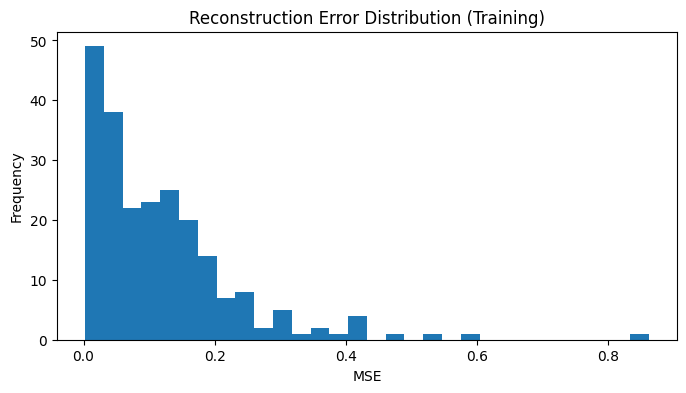

In [42]:
plt.figure(figsize=(8,4))
plt.hist(train_mse, bins=30)
plt.title("Reconstruction Error Distribution (Training)")
plt.xlabel("MSE")
plt.ylabel("Frequency")
plt.show()

We define two thresholds:

`T1`: known attack vs unknown attack

`T2`: unknown attack vs normal traffic

Since we don't have any `Normal` traffic data, it is not possible to set a threshold for its classification. Here we have considered twice the standard deviation to define the threshold.

In [44]:
T1 = np.mean(train_mse) + np.std(train_mse)
T2 = np.mean(train_mse) + 2 * np.std(train_mse)

print("Threshold 1 (new attack detection):", T1)
print("Threshold 2 (normal traffic detection):", T2)

Threshold 1 (new attack detection): 0.23404726431166062
Threshold 2 (normal traffic detection): 0.34975186531588215


# Training vs. Validation Loss

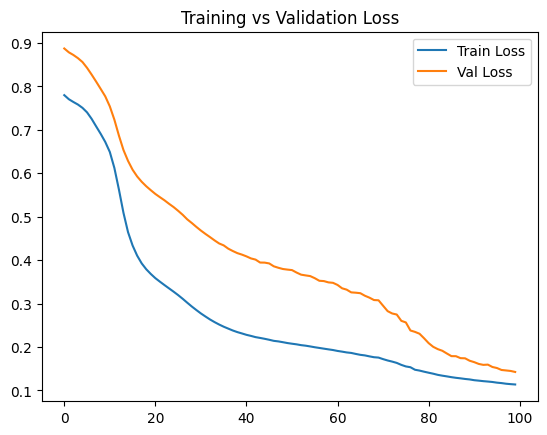

In [45]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

In [81]:
# method to classify an unseen data point
def detect_traffic(sample_scaled):
    pred = autoencoder.predict(sample_scaled.reshape(1, -1))
    mse = np.mean(np.power(sample_scaled - pred, 2))

    if mse <= T1:
        return "Known Attack", mse
    elif mse <= T2:
        return "Potential NEW Attack Variant", mse
    else:
        return "Likely Normal Traffic", mse